In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
np.set_printoptions(suppress=True)

In [3]:
df=pd.read_csv("csgo_round_snapshots.csv")
df.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00         0        0  de_dust2         False        500       500   
1     156.03         0        0  de_dust2         False        500       500   
2      96.03         0        0  de_dust2         False        391       400   
3      76.03         0        0  de_dust2         False        391       400   
4     174.97         1        0  de_dust2         False        500       500   

   ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
0         0        0      4000     4000           0          0   
1       400      300       600      650           0          0   
2       294      200       750      500           0          0   
3       294      200       750      500           0          0   
4       192        0     18350    10750           0          0   

   ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  \
0               0                 5                5               0   
1               1                 5                5               0   
2               1                 4                4               0   
3               1                 4                4               0   
4               1                 5                5               0   

   t_weapon_ak47  ct_weapon_aug  t_weapon_aug  ct_weapon_awp  t_weapon_awp  \
0              0              0             0              0             0   
1              0              0             0              0             0   
2              0              0             0              0             0   
3              0              0             0              0             0   
4              0              0             0              0             0   

   ct_weapon_bizon  t_weapon_bizon  ct_weapon_cz75auto  t_weapon_cz75auto  \
0                0               0                   0                  0   
1                0               0                   0                  0   
2                0               0                   0                  0   
3                0               0                   0                  0   
4                0               0                   0                  0   

   ct_weapon_elite  t_weapon_elite  ct_weapon_famas  t_weapon_famas  \
0                0               0                0               0   
1                0               0                0               0   
2                0               0                0               0   
3                0               0                0               0   
4                0               0                0               0   

   ct_weapon_g3sg1  t_weapon_g3sg1  ct_weapon_galilar  t_weapon_galilar  \
0                0               0                  0                 0   
1                0               0                  0                 0   
2                0               0                  0                 0   
3                0               0                  0                 0   
4                0               0                  0                 0   

   ct_weapon_glock  t_weapon_glock  ct_weapon_m249  t_weapon_m249  \
0                0               5               0              0   
1                0               5               0              0   
2                0               4               0              0   
3                0               3               0              0   
4                0               5               0              0   

   ct_weapon_m4a1s  t_weapon_m4a1s  ct_weapon_m4a4  t_weapon_m4a4  \
0                0               0               0              0   
1                0               0               0              0   
2                0               0               0              0   
3                0               0               0              0   
4                0               0               0              0   

   ct_weapon_mac10  t_weapon_mac10  ct_weapon_mag7  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  int64  
 2   t_score                       122410 non-null  int64  
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  int64  
 6   t_health                      122410 non-null  int64  
 7   ct_armor                      122410 non-null  int64  
 8   t_armor                       122410 non-null  int64  
 9   ct_money                      122410 non-null  int64  
 10  t_money                       122410 non-null  int64  
 11  ct_helmets                    122410 non-null  int64  
 12  t_helmets                     122410 non-nul

In [5]:
df.shape

(122410, 97)

In [6]:
df.nunique()

time_left                       10782
ct_score                           33
t_score                            34
map                                 8
bomb_planted                        2
ct_health                         501
t_health                          501
ct_armor                          415
t_armor                           477
ct_money                         1360
t_money                          1399
ct_helmets                          6
t_helmets                           6
ct_defuse_kits                      6
ct_players_alive                    6
t_players_alive                     6
ct_weapon_ak47                      5
t_weapon_ak47                       6
ct_weapon_aug                       6
t_weapon_aug                        4
ct_weapon_awp                       6
t_weapon_awp                        5
ct_weapon_bizon                     1
t_weapon_bizon                      2
ct_weapon_cz75auto                  6
t_weapon_cz75auto                   7
ct_weapon_el

In [7]:
df['bomb_planted'] = df['bomb_planted'].astype(str)

In [8]:
df['bomb_planted'].unique()

array(['False', 'True'], dtype=object)

In [9]:
df_cat=df.select_dtypes(object,bool)
df_num=df.select_dtypes(['int64','float64'])

In [10]:
df_num.head()

time_left  ct_score  t_score  ct_health  t_health  ct_armor  t_armor  \
0     175.00         0        0        500       500         0        0   
1     156.03         0        0        500       500       400      300   
2      96.03         0        0        391       400       294      200   
3      76.03         0        0        391       400       294      200   
4     174.97         1        0        500       500       192        0   

   ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  \
0      4000     4000           0          0               0                 5   
1       600      650           0          0               1                 5   
2       750      500           0          0               1                 4   
3       750      500           0          0               1                 4   
4     18350    10750           0          0               1                 5   

   t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  \
0                5               0              0              0   
1                5               0              0              0   
2                4               0              0              0   
3                4               0              0              0   
4                5               0              0              0   

   t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  t_weapon_bizon  \
0             0              0             0                0               0   
1             0              0             0                0               0   
2             0              0             0                0               0   
3             0              0             0                0               0   
4             0              0             0                0               0   

   ct_weapon_cz75auto  t_weapon_cz75auto  ct_weapon_elite  t_weapon_elite  \
0                   0                  0                0               0   
1                   0                  0                0               0   
2                   0                  0                0               0   
3                   0                  0                0               0   
4                   0                  0                0               0   

   ct_weapon_famas  t_weapon_famas  ct_weapon_g3sg1  t_weapon_g3sg1  \
0                0               0                0               0   
1                0               0                0               0   
2                0               0                0               0   
3                0               0                0               0   
4                0               0                0               0   

   ct_weapon_galilar  t_weapon_galilar  ct_weapon_glock  t_weapon_glock  \
0                  0                 0                0               5   
1                  0                 0                0               5   
2                  0                 0                0               4   
3                  0                 0                0               3   
4                  0                 0                0               5   

   ct_weapon_m249  t_weapon_m249  ct_weapon_m4a1s  t_weapon_m4a1s  \
0               0              0                0               0   
1               0              0                0               0   
2               0              0                0               0   
3               0              0                0               0   
4               0              0                0               0   

   ct_weapon_m4a4  t_weapon_m4a4  ct_weapon_mac10  t_weapon_mac10  \
0               0              0                0               0   
1               0              0                0               0   
2               0              0                0               0   
3               0              0                0               0   
4               0              0                0               0   

In [11]:
df_cat.head()

map bomb_planted round_winner
0  de_dust2        False           CT
1  de_dust2        False           CT
2  de_dust2        False           CT
3  de_dust2        False           CT
4  de_dust2        False           CT

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
df_cat.head()

map  bomb_planted  round_winner
0    1             0             0
1    1             0             0
2    1             0             0
3    1             0             0
4    1             0             0

In [14]:
df_cat.nunique()

map             8
bomb_planted    2
round_winner    2
dtype: int64

In [15]:
new_df=pd.concat([df_num,df_cat],axis=1)
new_df.head()

time_left  ct_score  t_score  ct_health  t_health  ct_armor  t_armor  \
0     175.00         0        0        500       500         0        0   
1     156.03         0        0        500       500       400      300   
2      96.03         0        0        391       400       294      200   
3      76.03         0        0        391       400       294      200   
4     174.97         1        0        500       500       192        0   

   ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  \
0      4000     4000           0          0               0                 5   
1       600      650           0          0               1                 5   
2       750      500           0          0               1                 4   
3       750      500           0          0               1                 4   
4     18350    10750           0          0               1                 5   

   t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  \
0                5               0              0              0   
1                5               0              0              0   
2                4               0              0              0   
3                4               0              0              0   
4                5               0              0              0   

   t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  t_weapon_bizon  \
0             0              0             0                0               0   
1             0              0             0                0               0   
2             0              0             0                0               0   
3             0              0             0                0               0   
4             0              0             0                0               0   

   ct_weapon_cz75auto  t_weapon_cz75auto  ct_weapon_elite  t_weapon_elite  \
0                   0                  0                0               0   
1                   0                  0                0               0   
2                   0                  0                0               0   
3                   0                  0                0               0   
4                   0                  0                0               0   

   ct_weapon_famas  t_weapon_famas  ct_weapon_g3sg1  t_weapon_g3sg1  \
0                0               0                0               0   
1                0               0                0               0   
2                0               0                0               0   
3                0               0                0               0   
4                0               0                0               0   

   ct_weapon_galilar  t_weapon_galilar  ct_weapon_glock  t_weapon_glock  \
0                  0                 0                0               5   
1                  0                 0                0               5   
2                  0                 0                0               4   
3                  0                 0                0               3   
4                  0                 0                0               5   

   ct_weapon_m249  t_weapon_m249  ct_weapon_m4a1s  t_weapon_m4a1s  \
0               0              0                0               0   
1               0              0                0               0   
2               0              0                0               0   
3               0              0                0               0   
4               0              0                0               0   

   ct_weapon_m4a4  t_weapon_m4a4  ct_weapon_mac10  t_weapon_mac10  \
0               0              0                0               0   
1               0              0                0               0   
2               0              0                0               0   
3               0              0                0               0   
4               0              0                0               0   

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  int64  
 2   t_score                       122410 non-null  int64  
 3   ct_health                     122410 non-null  int64  
 4   t_health                      122410 non-null  int64  
 5   ct_armor                      122410 non-null  int64  
 6   t_armor                       122410 non-null  int64  
 7   ct_money                      122410 non-null  int64  
 8   t_money                       122410 non-null  int64  
 9   ct_helmets                    122410 non-null  int64  
 10  t_helmets                     122410 non-null  int64  
 11  ct_defuse_kits                122410 non-null  int64  
 12  ct_players_alive              122410 non-nul

In [17]:
new_df['round_winner'].value_counts()

1    62406
0    60004
Name: round_winner, dtype: int64

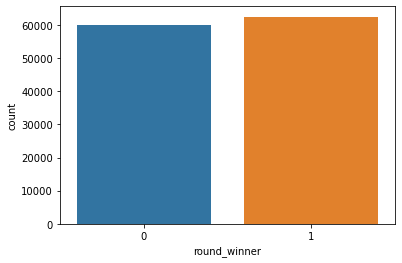

In [18]:
sns.countplot(new_df['round_winner'])
plt.show()

1  - Terrorist         - 62406

0  - Counter-Terrorist - 60004

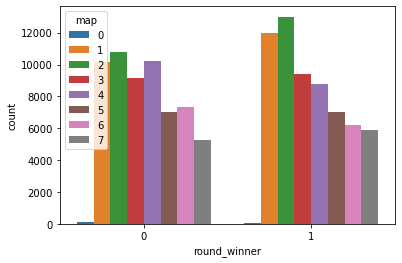

In [19]:
sns.countplot(new_df['round_winner'],hue=new_df['map'])
plt.show()

# Implementing Logistic Regression

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x=new_df.drop(['round_winner','ct_score','t_score'],axis=1)
y=new_df['round_winner']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logr=LogisticRegression()
logr.fit(x_train,y_train)
y_pred=logr.predict(x_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [24]:
np.set_printoptions(threshold=sys.maxsize)

In [25]:
print(y_pred)

[1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1
 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0
 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1
 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1
 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 1 1 0 0 1 1 0 1 0 0 1 

In [26]:
y_predicted=logr.predict_proba(x_test)
print(y_predicted)

[[0.36016773 0.63983227]
 [0.36882203 0.63117797]
 [0.47306057 0.52693943]
 [0.2046106  0.7953894 ]
 [0.12901378 0.87098622]
 [0.46933556 0.53066444]
 [0.67141249 0.32858751]
 [0.78327943 0.21672057]
 [0.34614371 0.65385629]
 [0.4570963  0.5429037 ]
 [0.47583448 0.52416552]
 [0.47728677 0.52271323]
 [0.43713441 0.56286559]
 [0.7911829  0.2088171 ]
 [0.39346338 0.60653662]
 [0.27426756 0.72573244]
 [0.46955208 0.53044792]
 [0.7891471  0.2108529 ]
 [0.84210459 0.15789541]
 [0.97396347 0.02603653]
 [0.29756017 0.70243983]
 [0.07736116 0.92263884]
 [0.92711233 0.07288767]
 [0.66055415 0.33944585]
 [0.19536657 0.80463343]
 [0.49734323 0.50265677]
 [0.6832479  0.3167521 ]
 [0.742638   0.257362  ]
 [0.22472485 0.77527515]
 [0.07395046 0.92604954]
 [0.57697464 0.42302536]
 [0.62245323 0.37754677]
 [0.47777726 0.52222274]
 [0.46189957 0.53810043]
 [0.20089121 0.79910879]
 [0.26186176 0.73813824]
 [0.65481654 0.34518346]
 [0.49495266 0.50504734]
 [0.63849838 0.36150162]
 [0.99738021 0.00261979]


In [27]:
print("Intercept : ",logr.intercept_)
print("Slope : ",logr.coef_)

Intercept :  [0.00018378]
Slope :  [[-0.00258049 -0.00619638  0.00741005 -0.00628034  0.00593278 -0.0000215
   0.0000197  -0.00023235  0.00037592 -0.00030946 -0.00000035  0.00040319
  -0.00003244  0.00020443 -0.00008788  0.00000429 -0.0001915   0.00007998
   0.         -0.00000023  0.00005645 -0.00004651 -0.00000148  0.00000123
   0.00000244  0.00000916  0.         -0.00000087 -0.00000575  0.00002563
   0.00000411  0.00040739  0.          0.         -0.00002132  0.00000551
  -0.00036653  0.00003676  0.00000438  0.00000852  0.00000148  0.00000007
   0.00000007  0.00000458  0.0000022  -0.00000226  0.00005485  0.00000804
   0.          0.         -0.00000071 -0.00000048 -0.00000065  0.00000089
   0.         -0.00000009  0.          0.00000021  0.0000003  -0.00000011
  -0.00006099  0.000219    0.00002356 -0.00000307  0.0000234   0.00002443
   0.00000024  0.0000001   0.00009452 -0.00002857  0.00003916 -0.00000237
  -0.00019698  0.00009411  0.00001179 -0.00001217  0.00000578  0.00000605
  -0

In [28]:
logr.score(x_test,y_test)

0.7418511559513111

# Confusion Matrix
-------------------------------

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test,y_pred)

array([[12760,  5256],
       [ 4224, 14483]], dtype=int64)

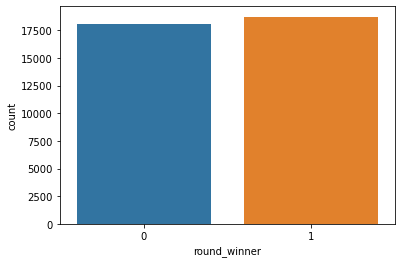

In [31]:
sns.countplot(y_test)
plt.show()

In [32]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [33]:
print("Confusion Matrix : ")
print("----------------------------------------------")
print("TP=",tp,"FP=",fp)
print("FN=",fn," TN=",tn)

Confusion Matrix : 
----------------------------------------------
TP= 14483 FP= 5256
FN= 4224  TN= 12760


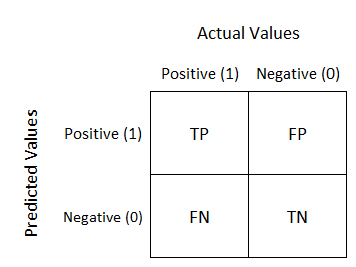

In [34]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [35]:
accuracy_score(y_test,y_pred)

0.7418511559513111

In [36]:
recall_score(y_test,y_pred)

0.7742021703105789

In [37]:
precision_score(y_test,y_pred)

0.7337251127210092

In [38]:
f1_score(y_test,y_pred)

0.7534203818342611

# ROC AUC
-------------------------------

In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
print(roc_auc_score(y_test,y_pred))
#roc_curve is written so that ROC point corresponding to 
#the highest threshold (fpr[0], tpr[0]) is always (0, 0). 
#If this is not the case, a new threshold is created with an arbitrary value of max(y_score)+1

0.7412307476774918


In [41]:
from sklearn.metrics import roc_curve

In [42]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [43]:
fpr

array([0.        , 0.29174067, 1.        ])

In [44]:
tpr

array([0.        , 0.77420217, 1.        ])

In [45]:
threshold

array([2, 1, 0])

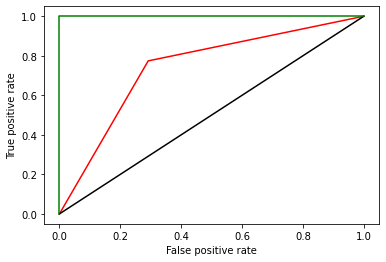

In [46]:
plt.plot(fpr,tpr,'r-')
plt.plot([0,1],[0,1],'k-',label="50% correct")  # first [] indicates x coordinates and the next [] are y coordinates
plt.plot([0,0,1],[0,1,1],'g-',label="excellent")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# Implementing ANOVA Feature Selection

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [48]:
anova=SelectKBest(score_func=f_regression,k=54)
anova.fit(x_train,y_train)
x_train_anova=anova.transform(x_train)
x_test_anova=anova.transform(x_test)

In [49]:
scores_df=pd.DataFrame(anova.scores_)
columns_df=pd.DataFrame(x.columns)
featureScore_anova=pd.concat([columns_df,scores_df],axis=1)
featureScore_anova.columns=['Feature_Names','Score']
featureScore_anova

Feature_Names         Score
0                      time_left    445.894920
1                      ct_health   3320.701293
2                       t_health    687.030210
3                       ct_armor  10809.096729
4                        t_armor   7814.034369
5                       ct_money   1489.680214
6                        t_money    784.044763
7                     ct_helmets   8839.344048
8                      t_helmets   8241.273423
9                 ct_defuse_kits   7811.905927
10              ct_players_alive   4309.430815
11               t_players_alive   1728.707684
12                ct_weapon_ak47   2449.593103
13                 t_weapon_ak47   3340.183815
14                 ct_weapon_aug    538.213829
15                  t_weapon_aug     86.166819
16                 ct_weapon_awp   3481.515529
17                  t_weapon_awp   1927.374381
18               ct_weapon_bizon           NaN
19                t_weapon_bizon      0.162128
20            ct_weapon_cz75auto     12.773862
21             t_weapon_cz75auto      3.720616
22               ct_weapon_elite     24.586088
23                t_weapon_elite      9.854756
24               ct_weapon_famas    203.077204
25                t_weapon_famas    115.261655
26               ct_weapon_g3sg1           NaN
27                t_weapon_g3sg1      1.409414
28             ct_weapon_galilar     95.406607
29              t_weapon_galilar    350.888750
30               ct_weapon_glock     41.839807
31                t_weapon_glock    401.819065
32                ct_weapon_m249           NaN
33                 t_weapon_m249           NaN
34               ct_weapon_m4a1s    181.117124
35                t_weapon_m4a1s     81.469957
36                ct_weapon_m4a4   2742.123190
37                 t_weapon_m4a4    660.972409
38               ct_weapon_mac10      0.753065
39                t_weapon_mac10    647.064347
40                ct_weapon_mag7     13.290786
41                 t_weapon_mag7      1.921735
42               ct_weapon_mp5sd      6.067327
43                t_weapon_mp5sd     86.309734
44                 ct_weapon_mp7      0.062486
45                  t_weapon_mp7      7.075615
46                 ct_weapon_mp9    326.983009
47                  t_weapon_mp9     47.546848
48               ct_weapon_negev           NaN
49                t_weapon_negev           NaN
50                ct_weapon_nova      0.459624
51                 t_weapon_nova      4.741134
52                 ct_weapon_p90      7.568732
53                  t_weapon_p90      3.689123
54          ct_weapon_r8revolver           NaN
55           t_weapon_r8revolver      4.163298
56            ct_weapon_sawedoff           NaN
57             t_weapon_sawedoff      0.484100
58              ct_weapon_scar20      0.905743
59               t_weapon_scar20      1.040750
60               ct_weapon_sg553   2337.356829
61                t_weapon_sg553   2331.787806
62               ct_weapon_ssg08    119.494460
63                t_weapon_ssg08      0.321555
64               ct_weapon_ump45     43.464576
65                t_weapon_ump45    390.555051
66              ct_weapon_xm1014     12.583913
67               t_weapon_xm1014      0.010039
68              ct_weapon_deagle     16.211619
69               t_weapon_deagle     96.446438
70           ct_weapon_fiveseven     45.524837
71            t_weapon_fiveseven    128.451089
72                ct_weapon_usps   2030.727999
73                 t_weapon_usps   1581.540854
74                ct_weapon_p250    229.540508
75                 t_weapon_p250    169.887005
76               ct_weapon_p2000     52.675040
77                t_weapon_p2000    106.546905
78                ct_weapon_tec9    161.612369
79                 t_weapon_tec9      0.693222
80          ct_grenade_hegrenade   2425.017528
81           t_grenade_hegrenade   1167.992050
82          ct_grenade_flashbang   5754.642556
83           t_grenade_flashbang   2427.853053
84       ct_grenade_smok

In [50]:
featureScore_anova.sort_values("Score",ascending=False)

Feature_Names         Score
3                       ct_armor  10809.096729
7                     ct_helmets   8839.344048
8                      t_helmets   8241.273423
4                        t_armor   7814.034369
9                 ct_defuse_kits   7811.905927
82          ct_grenade_flashbang   5754.642556
10              ct_players_alive   4309.430815
84       ct_grenade_smokegrenade   3885.037174
16                 ct_weapon_awp   3481.515529
13                 t_weapon_ak47   3340.183815
1                      ct_health   3320.701293
93                  bomb_planted   3078.621046
36                ct_weapon_m4a4   2742.123190
12                ct_weapon_ak47   2449.593103
86  ct_grenade_incendiarygrenade   2446.944661
83           t_grenade_flashbang   2427.853053
80          ct_grenade_hegrenade   2425.017528
60               ct_weapon_sg553   2337.356829
61                t_weapon_sg553   2331.787806
72                ct_weapon_usps   2030.727999
17                  t_weapon_awp   1927.374381
11               t_players_alive   1728.707684
85        t_grenade_smokegrenade   1691.283823
73                 t_weapon_usps   1581.540854
5                       ct_money   1489.680214
81           t_grenade_hegrenade   1167.992050
89      t_grenade_molotovgrenade   1155.207881
6                        t_money    784.044763
2                       t_health    687.030210
37                 t_weapon_m4a4    660.972409
39                t_weapon_mac10    647.064347
14                 ct_weapon_aug    538.213829
88     ct_grenade_molotovgrenade    502.097064
0                      time_left    445.894920
31                t_weapon_glock    401.819065
65                t_weapon_ump45    390.555051
29              t_weapon_galilar    350.888750
46                 ct_weapon_mp9    326.983009
74                ct_weapon_p250    229.540508
87   t_grenade_incendiarygrenade    227.835493
24               ct_weapon_famas    203.077204
34               ct_weapon_m4a1s    181.117124
75                 t_weapon_p250    169.887005
78                ct_weapon_tec9    161.612369
71            t_weapon_fiveseven    128.451089
62               ct_weapon_ssg08    119.494460
25                t_weapon_famas    115.261655
92                           map    109.754068
77                t_weapon_p2000    106.546905
69               t_weapon_deagle     96.446438
28             ct_weapon_galilar     95.406607
43                t_weapon_mp5sd     86.309734
15                  t_weapon_aug     86.166819
35                t_weapon_m4a1s     81.469957
91        t_grenade_decoygrenade     66.872737
76               ct_weapon_p2000     52.675040
90       ct_grenade_decoygrenade     50.963729
47                  t_weapon_mp9     47.546848
70           ct_weapon_fiveseven     45.524837
64               ct_weapon_ump45     43.464576
30               ct_weapon_glock     41.839807
22               ct_weapon_elite     24.586088
68              ct_weapon_deagle     16.211619
40                ct_weapon_mag7     13.290786
20            ct_weapon_cz75auto     12.773862
66              ct_weapon_xm1014     12.583913
23                t_weapon_elite      9.854756
52                 ct_weapon_p90      7.568732
45                  t_weapon_mp7      7.075615
42               ct_weapon_mp5sd      6.067327
51                 t_weapon_nova      4.741134
55           t_weapon_r8revolver      4.163298
21             t_weapon_cz75auto      3.720616
53                  t_weapon_p90      3.689123
41                 t_weapon_mag7      1.921735
27                t_weapon_g3sg1      1.409414
59               t_weapon_scar20      1.040750
58              ct_weapon_scar20      0.905743
38               ct_weapon_mac10      0.753065
79                 t_weapon_tec9      0.693222
57             t_weapon_sawedoff      0.484100
50                ct_weapon_nova      0.459624
63                t_weapon_ssg08      0.321555
19                t_weapon_bizon      0.162128
44                 ct_we

In [51]:
featureScore_anova.nlargest(54, "Score")

Feature_Names         Score
3                       ct_armor  10809.096729
7                     ct_helmets   8839.344048
8                      t_helmets   8241.273423
4                        t_armor   7814.034369
9                 ct_defuse_kits   7811.905927
82          ct_grenade_flashbang   5754.642556
10              ct_players_alive   4309.430815
84       ct_grenade_smokegrenade   3885.037174
16                 ct_weapon_awp   3481.515529
13                 t_weapon_ak47   3340.183815
1                      ct_health   3320.701293
93                  bomb_planted   3078.621046
36                ct_weapon_m4a4   2742.123190
12                ct_weapon_ak47   2449.593103
86  ct_grenade_incendiarygrenade   2446.944661
83           t_grenade_flashbang   2427.853053
80          ct_grenade_hegrenade   2425.017528
60               ct_weapon_sg553   2337.356829
61                t_weapon_sg553   2331.787806
72                ct_weapon_usps   2030.727999
17                  t_weapon_awp   1927.374381
11               t_players_alive   1728.707684
85        t_grenade_smokegrenade   1691.283823
73                 t_weapon_usps   1581.540854
5                       ct_money   1489.680214
81           t_grenade_hegrenade   1167.992050
89      t_grenade_molotovgrenade   1155.207881
6                        t_money    784.044763
2                       t_health    687.030210
37                 t_weapon_m4a4    660.972409
39                t_weapon_mac10    647.064347
14                 ct_weapon_aug    538.213829
88     ct_grenade_molotovgrenade    502.097064
0                      time_left    445.894920
31                t_weapon_glock    401.819065
65                t_weapon_ump45    390.555051
29              t_weapon_galilar    350.888750
46                 ct_weapon_mp9    326.983009
74                ct_weapon_p250    229.540508
87   t_grenade_incendiarygrenade    227.835493
24               ct_weapon_famas    203.077204
34               ct_weapon_m4a1s    181.117124
75                 t_weapon_p250    169.887005
78                ct_weapon_tec9    161.612369
71            t_weapon_fiveseven    128.451089
62               ct_weapon_ssg08    119.494460
25                t_weapon_famas    115.261655
92                           map    109.754068
77                t_weapon_p2000    106.546905
69               t_weapon_deagle     96.446438
28             ct_weapon_galilar     95.406607
43                t_weapon_mp5sd     86.309734
15                  t_weapon_aug     86.166819
35                t_weapon_m4a1s     81.469957

In [52]:
logr.fit(x_train_anova,y_train)

LogisticRegression()

In [53]:
print("Bias of Logistic Regression after Annova test = ",logr.score(x_train_anova,y_train))
print("Variance of Logistic Regression after Annova test =",logr.score(x_test_anova,y_test))

Bias of Logistic Regression after Annova test =  0.7328416212494311
Variance of Logistic Regression after Annova test = 0.741715001497699


In [54]:
y_predicted=logr.predict(x_test_anova)

In [55]:
tbl=pd.DataFrame(list(zip(y_test,y_predicted)),columns=['y_Observed','y_predicted'])
print(tbl)

       y_Observed  y_predicted
0               1            1
1               1            1
2               1            1
3               1            1
4               1            1
5               0            1
6               0            0
7               0            0
8               1            1
9               1            1
10              1            1
11              1            1
12              1            1
13              0            0
14              0            1
15              1            1
16              1            1
17              1            0
18              1            0
19              0            0
20              1            1
21              1            1
22              0            0
23              0            0
24              1            1
25              0            1
26              0            0
27              0            0
28              1            1
29              1            1
30              1            0
31      

# Implementing Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
from sklearn import tree

In [58]:
fig=plt.gcf()
fig.set_size_inches(150,100)

<Figure size 10800x7200 with 0 Axes>

In [59]:
dtg=DecisionTreeClassifier()
dtg.fit(x_train,y_train)
print("Gini Decision Tree Bias Score : ",dtg.score(x_train,y_train))
print("Gini Decision Tree Variance Score : ",dtg.score(x_test,y_test))

Gini Decision Tree Bias Score :  0.9949467247073652
Gini Decision Tree Variance Score :  0.8055442093510878


In [60]:
#tree.plot_tree(dtg.fit(x_train,y_train),fontsize=6)

In [61]:
dte=DecisionTreeClassifier(criterion="entropy")
dte.fit(x_train,y_train)
print("Entropy Decision Tree Bias Score : ",dte.score(x_train,y_train))
print("Entropy Decision Tree Variance Score : ",dte.score(x_test,y_test))

Entropy Decision Tree Bias Score :  0.9949467247073652
Entropy Decision Tree Variance Score :  0.8082945293140539


In [62]:
#tree.plot_tree(dte.fit(x_train,y_train),fontsize=6)

In [63]:
dtg1=DecisionTreeClassifier(criterion="gini",max_depth=10)
dtg1.fit(x_train,y_train)
print("Gini Decision Tree Bias Score : ",dtg1.score(x_train,y_train))
print("Entropy Decision Tree Variance Score : ",dtg1.score(x_test,y_test))

Gini Decision Tree Bias Score :  0.7738280019139426
Entropy Decision Tree Variance Score :  0.7613484737085751


In [64]:
#tree.plot_tree(dtg1.fit(x_train,y_train),fontsize=10)

In [65]:
dte1=DecisionTreeClassifier(criterion="entropy",max_depth=10)
dte1.fit(x_train,y_train)
print("Entropy Decision Tree Bias Score : ",dte1.score(x_train,y_train))
print("Entropy Decision Tree Variance Score : ",dte1.score(x_test,y_test))

Entropy Decision Tree Bias Score :  0.7694982902890753
Entropy Decision Tree Variance Score :  0.7611306265827955


In [66]:
#tree.plot_tree(dte1.fit(x_train,y_train),fontsize=10)

# Implementing Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf=RandomForestClassifier(n_estimators=50,max_depth=10)
rf.fit(x_train,y_train)
print("Random Forest Bias Score : ",rf.score(x_train,y_train))
print("Random Forest Variance Score : ",rf.score(x_test,y_test))

Random Forest Bias Score :  0.7805151306499235
Random Forest Variance Score :  0.771042670805762


# Implementing K-Nearest Neighbours

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [71]:
print("KNN Bias Score : ",knn.score(x_train,y_train))
print("KNN Variance Score : ",knn.score(x_test,y_test))

KNN Bias Score :  0.8396489549173154
KNN Variance Score :  0.7535604389619585


In [72]:
y_predict=knn.predict(x_test)

In [73]:
tbl=pd.DataFrame(list(zip(y_test,y_predict)),columns=['y_Observed','y_predicted'])
print(tbl)

       y_Observed  y_predicted
0               1            1
1               1            0
2               1            1
3               1            1
4               1            1
5               0            0
6               0            1
7               0            0
8               1            0
9               1            1
10              1            0
11              1            1
12              1            1
13              0            0
14              0            1
15              1            1
16              1            1
17              1            1
18              1            0
19              0            0
20              1            1
21              1            1
22              0            0
23              0            1
24              1            1
25              0            1
26              0            0
27              0            1
28              1            1
29              1            1
30              1            1
31      

# Implementing Support Vector Machines

In [74]:
from sklearn.svm import LinearSVC,SVC

In [75]:
svc=LinearSVC()
svc.fit(x_train,y_train)
print("Linear SVC Bias Score : ",svc.score(x_train,y_train))
print("Linear SVC Variance Score : ",svc.score(x_test,y_test))

Linear SVC Bias Score :  0.6987757769556642
Linear SVC Variance Score :  0.7031288293440079
